In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [33]:
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [34]:
df_mouse = pd.read_csv('data/mouse_drug_data.csv')

In [35]:
df_mouse.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [36]:
df_clinical = pd.read_csv('data/clinicaltrial_data.csv')

In [37]:
df_clinical.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [38]:
clinical_df = pd.concat([
    df_mouse,df_clinical
],ignore_index=True,sort=False).reset_index(drop=True)

In [39]:
clinical_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,NaN,NaN,NaN
1,x402,Stelasyn,NaN,NaN,NaN
2,a492,Stelasyn,NaN,NaN,NaN
3,w540,Stelasyn,NaN,NaN,NaN
4,v764,Stelasyn,NaN,NaN,NaN
...,...,...,...,...,...
2138,r944,NaN,45.0,41.581521,2.0
2139,u364,NaN,45.0,31.023923,3.0
2140,p438,NaN,45.0,61.433892,1.0
2141,x773,NaN,45.0,58.634971,4.0


In [43]:
clinical_df.to_csv("clinical_combine.csv", index=False, header=True)

TypeError: nan is not a string

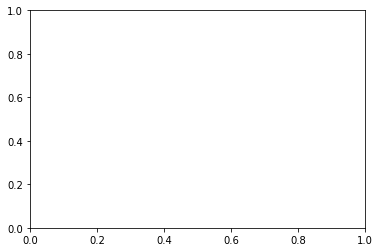

In [45]:
x_fga = clinical_df['Drug']
y_sal = clinical_df['Tumor Volume (mm3)']
plt.scatter(x_fga,y_sal,marker = 'o',edgecolors = 'black')
plt.title("Tumor Volume Changes")
plt.xlabel("Drug")
plt.ylabel("Tumor Volume")
plt.grid()
plt.yticks(np.arange(0,50000000,10000000))
plt.xticks(np.arange(0,20,2))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_fga, y_sal)
regress_values = x_fga * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_fga,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")